In [226]:
df_bids = pd.read_csv('/Users/iris/Documents/projects/mcnulty/data/bids.csv')

In [227]:
df_bids.describe()

,bid_id,time
count,7.656334e+06,7.656334e+06
mean,3.828166e+06,9.697978e+15
std,2.210193e+06,5.250518e+13
min,0.000000e+00,9.631917e+15
25%,1.914083e+06,9.641139e+15
50%,3.828166e+06,9.700654e+15
75%,5.742250e+06,9.761744e+15
max,7.656333e+06,9.772885e+15


In [228]:
df_bids.tail()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
7656329,7656329,626159dd6f2228ede002d9f9340f75b7puk8d,3e64w,jewelry,phone91,9709222052631578,ru,140.204.227.63,cghhmomsaxi6pug
7656330,7656330,a318ea333ceee1ba39a494476386136a826dv,xn0y0,mobile,phone236,9709222052631578,pl,24.232.159.118,wgggpdg2gx5pesn
7656331,7656331,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,gja6c,sporting goods,phone80,9709222052631578,za,80.237.28.246,5xgysg14grlersa
7656332,7656332,d4bd412590f5106b9d887a43c51b254eldo4f,hmwk8,jewelry,phone349,9709222052631578,my,91.162.27.152,bhtrek44bzi2wfl
7656333,7656333,0ea62aaa9c3ffcc6db584cb69c1f6c4bcripp,c9ox9,mobile,phone82,9709222052631578,jo,160.243.101.60,vasstdc27m7nks3


In [229]:
#New df to store features to
res = df_bids
res = res.drop(columns = ['auction','merchandise','device','time','country','ip','url','bid_id'])

In [230]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 1 columns):
bidder_id    object
dtypes: object(1)
memory usage: 58.4+ MB


In [231]:
#Total number of countries from which bids were placed in an auction 
b = df_bids[['bidder_id', 'auction', 'country']].groupby(['bidder_id','auction']).country.nunique().reset_index()
b = b.rename(columns = {'country':'countries_per_bidder_per_auction'})

In [232]:
#Median number of countries from which bids were placed in an auction 
c = b.groupby('bidder_id').countries_per_bidder_per_auction.median().reset_index()
c = c.rename(columns = {'countries_per_bidder_per_auction':'countries_per_bidder_per_auction_median'})

In [233]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6614 entries, 0 to 6613
Data columns (total 2 columns):
bidder_id                                  6614 non-null object
countries_per_bidder_per_auction_median    6614 non-null float64
dtypes: float64(1), object(1)
memory usage: 103.4+ KB


In [234]:
#Total number of bids placed
z = df_bids[['bidder_id', 'auction']].groupby(['bidder_id','auction']).url.nunique().reset_index()

AttributeError: 'DataFrameGroupBy' object has no attribute 'url'

In [235]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382341 entries, 0 to 382340
Data columns (total 3 columns):
bidder_id    382341 non-null object
auction      382341 non-null object
url          382341 non-null int64
dtypes: int64(1), object(2)
memory usage: 8.8+ MB


In [236]:
e.head()

,bidder_id,url_per_bidder_per_auction_mean
0,001068c415025a009fee375a12cff4fcnht8y,1.000000
1,002d229ffb247009810828f648afc2ef593rb,1.000000
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.000000
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.000000
4,00486a11dff552c4bd7696265724ff81yeo9v,1.307692


In [237]:
#df1 = (pd.merge(bids_per_auction_median, auctionN,on='bidder_id'))
res = (pd.merge(c, e , on = 'bidder_id'))
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6614 entries, 0 to 6613
Data columns (total 3 columns):
bidder_id                                  6614 non-null object
countries_per_bidder_per_auction_median    6614 non-null float64
url_per_bidder_per_auction_mean            6614 non-null float64
dtypes: float64(2), object(1)
memory usage: 206.7+ KB


In [238]:
res.head()

,bidder_id,countries_per_bidder_per_auction_median,url_per_bidder_per_auction_mean
0,001068c415025a009fee375a12cff4fcnht8y,1.0,1.000000
1,002d229ffb247009810828f648afc2ef593rb,1.0,1.000000
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.0,1.000000
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.0,1.000000
4,00486a11dff552c4bd7696265724ff81yeo9v,1.0,1.307692


In [239]:
#total number of ips from which bids were placed in an auction
ip = df_bids[['bidder_id', 'auction', 'ip']].groupby(['bidder_id','auction']).ip.nunique().reset_index()
#meadian number of ips per user
ip_median = ip.groupby('bidder_id').ip.median().reset_index()
ip_median = ip_median.rename(columns = {'ip':'ip_median_per_auction'})

In [240]:
ip_median.head()

,bidder_id,ip_median_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,1.0
1,002d229ffb247009810828f648afc2ef593rb,1.0
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.0
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.0
4,00486a11dff552c4bd7696265724ff81yeo9v,1.0


In [241]:
#Use a right join to add above df columns to the ongoing res df
res = pd.merge(res, ip_median, on = 'bidder_id', how = 'right')
res.head()

,bidder_id,countries_per_bidder_per_auction_median,url_per_bidder_per_auction_mean,ip_median_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,1.0,1.000000,1.0
1,002d229ffb247009810828f648afc2ef593rb,1.0,1.000000,1.0
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.0,1.000000,1.0
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.0,1.000000,1.0
4,00486a11dff552c4bd7696265724ff81yeo9v,1.0,1.307692,1.0


In [248]:
#Total number of device types from which bids were for an auction placed
device = df_bids[['bidder_id','auction','device']].groupby(['bidder_id','auction']).device.nunique().reset_index()
device_per_user_median = device.groupby('bidder_id').device.mean().reset_index()

In [249]:
device.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382341 entries, 0 to 382340
Data columns (total 3 columns):
bidder_id    382341 non-null object
auction      382341 non-null object
device       382341 non-null int64
dtypes: int64(1), object(2)
memory usage: 8.8+ MB


In [250]:
device.head()

,bidder_id,auction,device
0,001068c415025a009fee375a12cff4fcnht8y,4ifac,1
1,002d229ffb247009810828f648afc2ef593rb,2tdw2,2
2,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,cqsh6,1
4,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,efh5o,1


In [251]:
device_per_user_median = device_per_user_median.rename(columns = {'device':'device_per_user_median'})
device_per_user_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6614 entries, 0 to 6613
Data columns (total 2 columns):
bidder_id                 6614 non-null object
device_per_user_median    6614 non-null float64
dtypes: float64(1), object(1)
memory usage: 103.4+ KB


In [252]:
#Use a right join to add above df columns to the ongoing res df
res = pd.merge(res, device_per_user_median, on = 'bidder_id', how = 'right')
res.head()

,bidder_id,countries_per_bidder_per_auction_median,url_per_bidder_per_auction_mean,ip_median_per_auction,device_per_user_median_x,device_per_user_median_y
0,001068c415025a009fee375a12cff4fcnht8y,1.0,1.000000,1.0,1.000000,1.000000
1,002d229ffb247009810828f648afc2ef593rb,1.0,1.000000,1.0,2.000000,2.000000
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.0,1.000000,1.0,1.000000,1.000000
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.0,1.000000,1.0,1.000000,1.000000
4,00486a11dff552c4bd7696265724ff81yeo9v,1.0,1.307692,1.0,1.538462,1.538462


In [253]:
res = res.drop(columns = 'device_per_user_median_y')
res.rename(columns={'device_per_user_median_x':'device_per_user_median'}, inplace=True)
res.head()

,bidder_id,countries_per_bidder_per_auction_median,url_per_bidder_per_auction_mean,ip_median_per_auction,device_per_user_median
0,001068c415025a009fee375a12cff4fcnht8y,1.0,1.000000,1.0,1.000000
1,002d229ffb247009810828f648afc2ef593rb,1.0,1.000000,1.0,2.000000
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.0,1.000000,1.0,1.000000
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.0,1.000000,1.0,1.000000
4,00486a11dff552c4bd7696265724ff81yeo9v,1.0,1.307692,1.0,1.538462


In [254]:
#Number auctions per user
auctionN = df_bids[['bidder_id','auction']].groupby(['bidder_id']).auction.nunique().reset_index()

In [255]:
auctionN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6614 entries, 0 to 6613
Data columns (total 2 columns):
bidder_id    6614 non-null object
auction      6614 non-null int64
dtypes: int64(1), object(1)
memory usage: 103.4+ KB


In [256]:
auctionN['number_of_auctions_per_bidder'] = auctionN['auction']

In [257]:
auctionN = auctionN.drop(columns='auction')

In [258]:
auctionN.head()

,bidder_id,number_of_auctions_per_bidder
0,001068c415025a009fee375a12cff4fcnht8y,1
1,002d229ffb247009810828f648afc2ef593rb,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3
4,00486a11dff552c4bd7696265724ff81yeo9v,13


In [259]:
#Use a right join to add above df columns to the ongoing res df
res = pd.merge(res, auctionN, on = 'bidder_id', how = 'right')
res.head()

,bidder_id,countries_per_bidder_per_auction_median,url_per_bidder_per_auction_mean,ip_median_per_auction,device_per_user_median,number_of_auctions_per_bidder
0,001068c415025a009fee375a12cff4fcnht8y,1.0,1.000000,1.0,1.000000,1
1,002d229ffb247009810828f648afc2ef593rb,1.0,1.000000,1.0,2.000000,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.0,1.000000,1.0,1.000000,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.0,1.000000,1.0,1.000000,3
4,00486a11dff552c4bd7696265724ff81yeo9v,1.0,1.307692,1.0,1.538462,13


In [260]:
#Total number of bids per bidder in an auction
bidsN = df_bids[['bidder_id','auction','bid_id']].groupby(['bidder_id','auction']).bid_id.nunique().reset_index()

In [261]:
bidsN.head()

,bidder_id,auction,bid_id
0,001068c415025a009fee375a12cff4fcnht8y,4ifac,1
1,002d229ffb247009810828f648afc2ef593rb,2tdw2,2
2,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,cqsh6,1
4,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,efh5o,1


In [262]:
#Median number of bids per auction per bidder
bids_per_auction_median = bidsN.groupby('bidder_id').bid_id.median().reset_index()
bids_per_auction_median = bids_per_auction_median.rename(columns = {'bid_id':'bids_per_auction_median'})
bids_per_auction_median.head()

,bidder_id,bids_per_auction_median
0,001068c415025a009fee375a12cff4fcnht8y,1.0
1,002d229ffb247009810828f648afc2ef593rb,2.0
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.0
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.0
4,00486a11dff552c4bd7696265724ff81yeo9v,1.0


In [263]:
#Use a right join to add above df columns to the ongoing res df
res = pd.merge(res, bids_per_auction_median, on = 'bidder_id', how = 'right')
res.head()

,bidder_id,countries_per_bidder_per_auction_median,url_per_bidder_per_auction_mean,ip_median_per_auction,device_per_user_median,number_of_auctions_per_bidder,bids_per_auction_median
0,001068c415025a009fee375a12cff4fcnht8y,1.0,1.000000,1.0,1.000000,1,1.0
1,002d229ffb247009810828f648afc2ef593rb,1.0,1.000000,1.0,2.000000,1,2.0
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.0,1.000000,1.0,1.000000,1,1.0
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.0,1.000000,1.0,1.000000,3,1.0
4,00486a11dff552c4bd7696265724ff81yeo9v,1.0,1.307692,1.0,1.538462,13,1.0


In [264]:
df_bidder = pd.read_csv('/Users/iris/Documents/projects/mcnulty/data/train.csv')

In [265]:
df_bidder.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [266]:
df_bidder['outcome'].value_counts()

0.0    1910
1.0     103
Name: outcome, dtype: int64

In [267]:
# Separate DFs for each bots and real users
df_bots = df_bidder.loc[df_bidder['outcome'] == 1.0]
df_real_users = df_bidder.loc[df_bidder['outcome'] == 0.0]

#Create a df of real users of same count as bots
df_real_users_103 = df_real_users.sample(103)

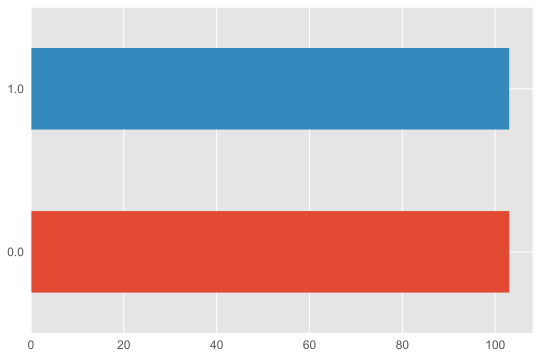

In [268]:
#Create one dataframe with equal number of two classes
frames = [df_bots, df_real_users_103]
df_classification = pd.concat(frames)

#Check for accuracy visually
df_classification.outcome.value_counts().plot('barh');

In [269]:
df_classification = df_classification.rename(columns = {'outcome':'class'})
df_classification.head()

,bidder_id,payment_account,address,class
21,5354c02817e47f28e60e44a40ca5e48dll4sz,1862ef3b7965993cc975a1161010e810w2bwo,58e5dc4d38d886f6c7abf0c264a51cb7alhj2,1.0
50,9434778d2268f1fa2a8ede48c0cd05c097zey,ee3295c7b31a1e9116ebf0cf2df68ed1ac8ts,627fe7481f01372c02333477471cb237qt2vf,1.0
51,aabc211b4cf4d29e4ac7e7e361371622pockb,a3d2de7675556553a5f08e4c88d2c228pxtr6,a3d2de7675556553a5f08e4c88d2c228bxn98,1.0
58,68d468e15e0de0bab9694cdca8e799eb2j8kn,a3d2de7675556553a5f08e4c88d2c228vf08k,767150cd5a97ed796bfc58456f5500250dsv7,1.0
77,1cbd9081de4481ada66f1853737f7684ddjd1,a3d2de7675556553a5f08e4c88d2c228buft1,a3d2de7675556553a5f08e4c88d2c228pijoz,1.0


In [270]:
df_classification = df_classification.drop(columns=['payment_account', 'address'])

In [271]:
df_classification.head()

,bidder_id,class
21,5354c02817e47f28e60e44a40ca5e48dll4sz,1.0
50,9434778d2268f1fa2a8ede48c0cd05c097zey,1.0
51,aabc211b4cf4d29e4ac7e7e361371622pockb,1.0
58,68d468e15e0de0bab9694cdca8e799eb2j8kn,1.0
77,1cbd9081de4481ada66f1853737f7684ddjd1,1.0


In [272]:
df_modeling = pd.merge (res, df_classification, on = 'bidder_id', how = 'right')
df_modeling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 205
Data columns (total 8 columns):
bidder_id                                  206 non-null object
countries_per_bidder_per_auction_median    205 non-null float64
url_per_bidder_per_auction_mean            205 non-null float64
ip_median_per_auction                      205 non-null float64
device_per_user_median                     205 non-null float64
number_of_auctions_per_bidder              205 non-null float64
bids_per_auction_median                    205 non-null float64
class                                      206 non-null float64
dtypes: float64(7), object(1)
memory usage: 14.5+ KB


In [273]:
df_modeling = df_modeling[df_modeling.countries_per_bidder_per_auction_median.notnull()]
df_modeling.tail()

,bidder_id,countries_per_bidder_per_auction_median,url_per_bidder_per_auction_mean,ip_median_per_auction,device_per_user_median,number_of_auctions_per_bidder,bids_per_auction_median,class
200,f2f10539ed947e4b141b2e9bf21af65ecz4f7,1.0,4.800000,31.0,1.000000,10.0,31.0,1.0
201,f35082c6d72f1f1be3dd23f949db1f577t6wd,1.0,1.000000,1.0,1.000000,1.0,1.0,1.0
202,fae553f133602fba6e9e6051dfb27fefkruax,1.0,1.000000,1.0,1.869565,46.0,1.0,1.0
203,ffaf0a972a6dcb3910fd6b16045781e2ava5y,1.0,1.000000,1.0,1.000000,3.0,1.0,0.0
204,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,1.0,1.333333,1.0,1.333333,15.0,1.0,0.0


## Modeling results

In [274]:
#Test data file from Kaggle
test = pd.read_csv('/Users/iris/Documents/projects/mcnulty/data/test.csv')

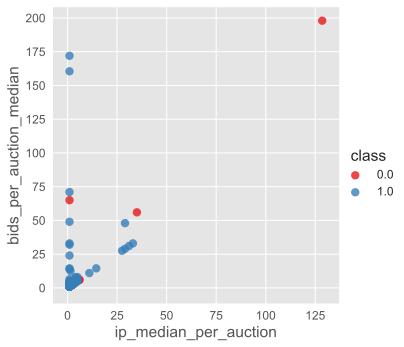

In [275]:
#Are there any features that split the data well?
sns.lmplot('ip_median_per_auction', 'bids_per_auction_median', data=df_modeling, hue='class',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

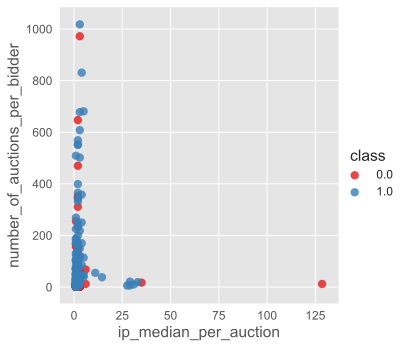

In [276]:
sns.lmplot('ip_median_per_auction', 'number_of_auctions_per_bidder', data=df_modeling, hue='class',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

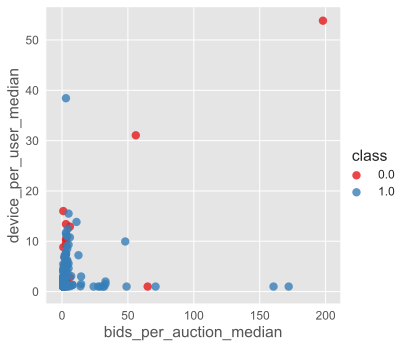

In [277]:
sns.lmplot('bids_per_auction_median', 'device_per_user_median', data=df_modeling, hue='class',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [278]:
#Train test split for modeling
X = df_modeling[['countries_per_bidder_per_auction_median',
 'url_per_bidder_per_auction_mean',
 'ip_median_per_auction',
 'device_per_user_median',
 'number_of_auctions_per_bidder',
 'bids_per_auction_median']]
y = df_modeling[['class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [280]:
# Feature names
model_features = df_modeling.columns.values.tolist()
model_features

['bidder_id',
 'countries_per_bidder_per_auction_median',
 'url_per_bidder_per_auction_mean',
 'ip_median_per_auction',
 'device_per_user_median',
 'number_of_auctions_per_bidder',
 'bids_per_auction_median',
 'class']

In [281]:
# Specify inputs for the model
classifiers = df_modeling[['countries_per_bidder_per_auction_median',
 'url_per_bidder_per_auction_mean',
 'ip_median_per_auction',
 'device_per_user_median',
 'number_of_auctions_per_bidder',
 'bids_per_auction_median']].as_matrix()
class_label = np.where(df_modeling['class'] == 1)

print(class_label)

(array([  0,   2,   4,   5,   6,   9,  13,  17,  19,  20,  21,  22,  24,
        29,  34,  35,  36,  37,  38,  39,  40,  43,  44,  48,  49,  50,
        51,  52,  54,  56,  57,  62,  65,  67,  68,  69,  70,  71,  72,
        77,  82,  83,  84,  86,  89,  91,  95,  96,  98, 101, 103, 105,
       106, 109, 114, 117, 120, 121, 123, 125, 127, 130, 131, 132, 134,
       136, 137, 138, 139, 140, 141, 142, 145, 148, 151, 152, 153, 154,
       157, 158, 161, 162, 163, 166, 168, 169, 170, 171, 173, 175, 177,
       182, 183, 186, 187, 189, 191, 192, 193, 198, 200, 201, 202]),)


In [290]:
y_pred = model_svm.predict(X_test)

In [291]:
accuracy_score(y_test,y_pred)

0.7560975609756098

In [292]:
confusion_matrix(y_test,y_pred)


array([[16,  3],
       [ 7, 15]])

In [298]:
model_svm2 = svm.SVC(kernel='rbf', gamma = 0.001)
model_svm2.fit(X_train, y_train)

NameError: name 'svm' is not defined

In [299]:
y_pred2 = model_svm2.predict(X_test)
accuracy_score(y_test,y_pred2)

0.8536585365853658

In [300]:
confusion_matrix(y_test,y_pred2)

array([[16,  3],
       [ 3, 19]])

In [301]:
#KNN for 5 neighbours
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)


print(metrics.accuracy_score(y, y_pred))

0.824390243902439


/Users/iris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [302]:
# Train on training set, and Test on testing set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7804878048780488


/Users/iris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [175]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier(algorithm = 'brute')
clf = GridSearchCV(knn, param_grid = classifiers, cv=5)
clf.fit(X_train,Y_train)
clf.best_params_

clf.score(X_test,Y_test)

AttributeError: 'numpy.ndarray' object has no attribute 'items'

In [303]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [304]:
df_modeling.head()

,bidder_id,countries_per_bidder_per_auction_median,url_per_bidder_per_auction_mean,ip_median_per_auction,device_per_user_median,number_of_auctions_per_bidder,bids_per_auction_median,class
0,022ac3a7ce986049d9a4bede83ccf9ddctvg6,1.0,1.611765,4.0,3.082353,85.0,7.0,1.0
1,03a1e81cb7bcd15014489a6f752c9d5b7pvel,1.0,1.200000,1.0,1.333333,15.0,2.0,0.0
2,041d869edcadf595b90e3b5248903183pn754,1.0,1.009709,2.0,2.621359,103.0,2.0,1.0
3,055282b75717345ba6f53d40e9e6d6c56qrzp,1.0,18.341040,2.0,9.988439,346.0,3.0,0.0
4,060ac64ff78ae62e9bc697192cebea333760p,1.0,1.291667,1.0,1.083333,24.0,6.5,1.0


In [305]:
from sklearn.svm import SVC

y=df_modeling.iloc[:,-1]
X=df_modeling.iloc[:, 1:5]

In [306]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=1, C=1)
# Train the classifier
svm.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [307]:
# Visualize the decision boundaries
plot_decision_regions(X, y, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

TypeError: unhashable type: 'slice'

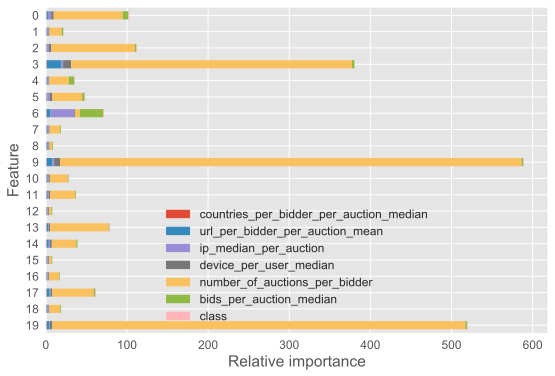

In [308]:
df_plot = df_modeling[:20]

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
matplotlib.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 13})
matplotlib.rcParams['figure.figsize'] = 9, 6
ax = df_plot.plot(kind='barh', stacked = True)
ax.invert_yaxis()
plt.xlabel('Relative importance')
plt.ylabel('Feature');